In [ ]:

import warnings
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
%matplotlib inline

warnings.filterwarnings("ignore")

In [ ]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")


In [55]:
top_city = 20
df.groupby(['city']).city.value_counts().nlargest(top_city)


city         city       
תל אביב יפו  תל אביב יפו    24242
חיפה         חיפה           22781
באר שבע      באר שבע        21686
ירושלים      ירושלים        21634
פתח תקווה    פתח תקווה      14333
אשדוד        אשדוד          13601
אשקלון       אשקלון         13424
נתניה        נתניה          12948
ראשון לציון  ראשון לציון    12212
חולון        חולון           9946
רמת גן       רמת גן          9103
בת ים        בת ים           8467
רחובות       רחובות          7558
חדרה         חדרה            6470
נהריה        נהריה           5414
אילת         אילת            5347
קרית אתא     קרית אתא        4607
עפולה        עפולה           4213
בני ברק      בני ברק         3430
לוד          לוד             3258
Name: city, dtype: int64

In [56]:
# choose city
cities = df.groupby(['city']).city.value_counts().nlargest(top_city)


תל אביב יפו
חיפה
באר שבע
ירושלים
פתח תקווה
אשדוד
אשקלון
נתניה
ראשון לציון
חולון
רמת גן
בת ים
רחובות
חדרה
נהריה
אילת
קרית אתא
עפולה
בני ברק
לוד
תל אביב יפו
חיפה
באר שבע
ירושלים
פתח תקווה
אשדוד
אשקלון
נתניה
ראשון לציון
חולון
רמת גן
בת ים
רחובות
חדרה
נהריה
אילת
קרית אתא
עפולה
בני ברק
לוד


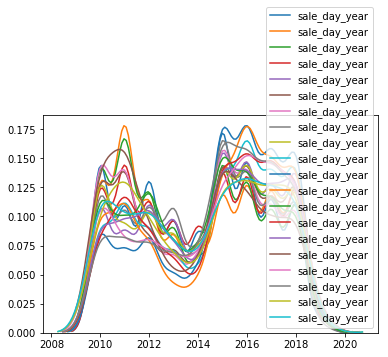

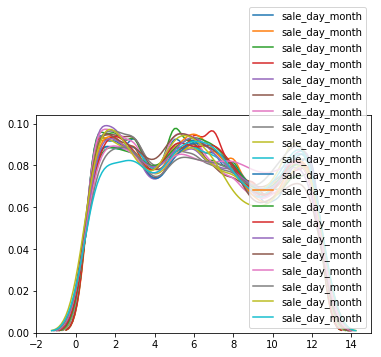

In [57]:
for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    
    sns.kdeplot(_df['sale_day_year'])
plt.show()

for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    
    sns.kdeplot(_df['sale_day_month'])
plt.show()